In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Rebuilding some graphics from the book "Mathematics for machine learning" by Deisenroth et al., see here https://mml-book.github.io/

In [ ]:
#function to plot the matrix
def plot_data(A,c):
    fig, ax = plt.subplots(1,1, figsize=(5,5))

    ax.axhline(0, color='black', linewidth=1)  # Horizontal line
    ax.axvline(0, color='black', linewidth=1)  # Vertical line

    # Remove the default axis lines, ticks, and labels
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

    # Set the limits to ensure the cross is centered
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    #plt.scatter(A[:,0], A[:,1])

    cmap = plt.get_cmap('viridis')

    
    
    x = A[:, :, 0].flatten()
    y = A[:, :, 1].flatten()
    plt.scatter(x,y, cmap = cmap, c = c , s=20)
    #plt.scatter(x,y)
    
    plt.show()


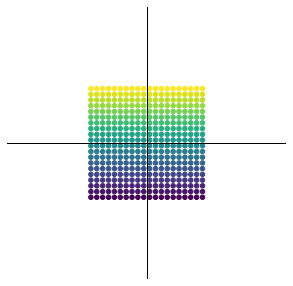

In [ ]:
#create a matrix
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
xx, yy = np.meshgrid(x, y)
A = np.stack((xx, yy), axis=-1)
colors = np.linspace(0, 1, 20)
colors = np.repeat(colors[:, np.newaxis], 20, axis=1).flatten()
plot_data(A, colors)

In [14]:
#function to evaluate a transformation matrix and plot the transformed matrix
def evaluate_t(t):
    eigval, eigvec = np.linalg.eig(t)
    print("Eigenvalues:", eigval)
    print("Eigenvectors:", eigvec)
    det = np.linalg.det(t)
    print("Determinant:", det)
    if det != 0:
        print("Inverse:", np.linalg.inv(t))
    plot_data(A@t, colors)
    

Eigenvalues: [0.5 2. ]
Eigenvectors: [[1. 0.]
 [0. 1.]]
Determinant: 1.0
Inverse: [[2.  0. ]
 [0.  0.5]]


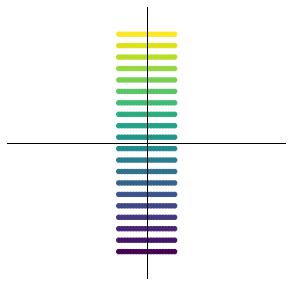

In [ ]:
#scaling
evaluate_t(np.array([[0.5,0 ], [0,2]]))


Eigenvalues: [1. 1.]
Eigenvectors: [[ 0.0000000e+00  4.4408921e-16]
 [ 1.0000000e+00 -1.0000000e+00]]
Determinant: 1.0
Inverse: [[ 1.   0. ]
 [-0.5  1. ]]


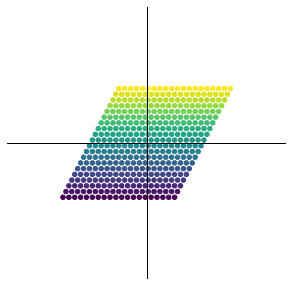

In [ ]:
#shearing (and scaling)
evaluate_t(np.array([[1,0],[0.5,1]]))

Eigenvalues: [0.8660254+0.5j 0.8660254-0.5j]
Eigenvectors: [[0.        -0.70710678j 0.        +0.70710678j]
 [0.70710678+0.j         0.70710678-0.j        ]]
Determinant: 0.9999999999999999
Inverse: [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


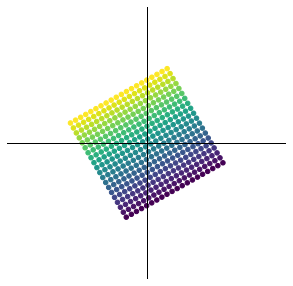

In [ ]:
#rotating
evaluate_t( 0.5 * np.array([[np.sqrt(3),1],[-1,np.sqrt(3)]]))

Eigenvalues: [1.00000000e+00 1.11022302e-16]
Eigenvectors: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Determinant: 0.0


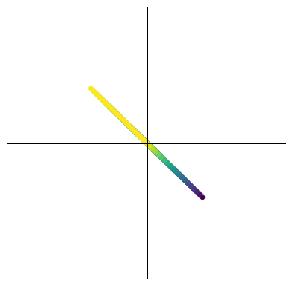

In [15]:
#projection on a line
t = 0.5 * np.array([[1,-1],[-1,1]])
evaluate_t(t)


Eigenvalues: [1.5 0.5]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Determinant: 0.75
Inverse: [[ 1.33333333 -0.66666667]
 [-0.66666667  1.33333333]]


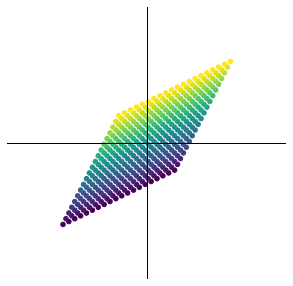

In [12]:
evaluate_t(np.array([[1, 0.5],[0.5,1]]))

Eigenvalues: [2. 2.]
Eigenvectors: [[ 0.0000000e+00  8.8817842e-16]
 [ 1.0000000e+00 -1.0000000e+00]]
Determinant: 4.0
Inverse: [[ 0.5    0.   ]
 [-0.125  0.5  ]]


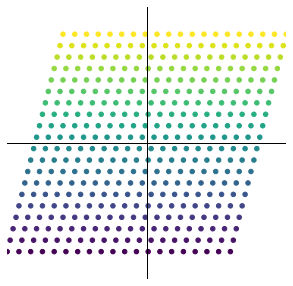

In [13]:
evaluate_t(np.array([[2,0],[0.5,2]]))